# Geographic Plots

Altair 2.0 added the ability to plot geographic data.

This funcitonality is still a bit incomplete (for example, not all interactions or selections work properly on projected data), but is relatively straightforward to use.

We'll show a few examples here.

In [1]:
import altair as alt

# Altair plots render by default in JupyterLab and nteract

# Uncomment/run this line to enable Altair in the classic notebook (not in JupyterLab)
alt.renderers.enable('notebook')

# Uncomment/run this line to enable Altair in Colab
# alt.renderers.enable('colab')

RendererRegistry.enable('notebook')

## Scatter-Plots in Geographic Coordinates

First, we'll show an example of plotting Latitude/Longitude data using a map projection.
We'll load the dataset consisting of the latitude/longitude of every US airport:

In [2]:
from vega_datasets import data
airports = data.airports()
airports.head()

,iata,name,city,state,country,latitude,longitude
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


The plot is quite similar to a standard scatter plot, with a couple differences:

- we specify the "latitude" and "longitude" encodings in place of "x" and "y"
- we specify a projection to use for the data

For data covering only the United States, the ``"albersUsa"`` projection is useful:

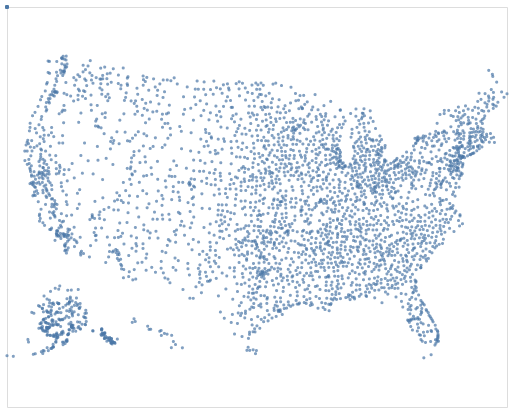

In [3]:
alt.Chart(airports).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    size=alt.value(10),
    tooltip='name'
).project(
    "albersUsa"
).properties(
    width=500,
    height=400
)

The available projections are listed in the [vega documentation](https://vega.github.io/vega/docs/projections/).

## Choropleth Maps

If you would like to plot geographic boundaries, such as states and countries, you must load the geographic shape data to show in Altair.
This takes a bit of boilerplate (we're thinking about how to streamline this kind of common construct in future releases) and uses the ``geoshape`` marker.

For example, here are the state boundaries:

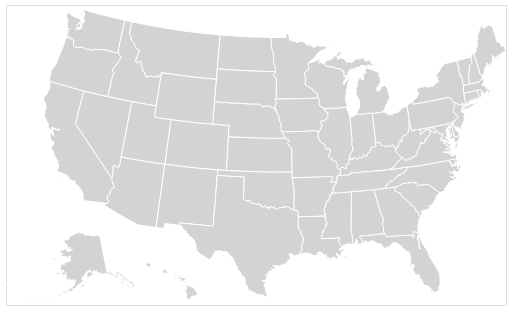

In [4]:
states = alt.topo_feature(data.us_10m.url, feature='states')

alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).project('albersUsa').properties(
    width=500,
    height=300
)

And here are the world country boundaries:

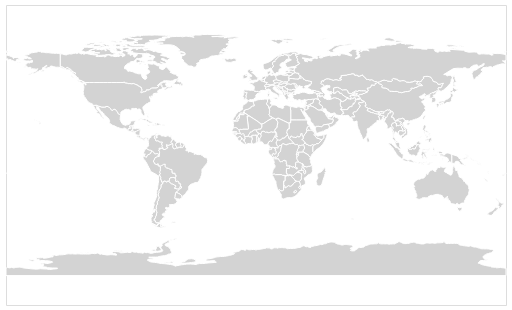

In [5]:
import altair as alt
from vega_datasets import data

countries = alt.topo_feature(data.world_110m.url, 'countries')

alt.Chart(countries).mark_geoshape(
    fill='lightgray',
    stroke='white'
).project(
    "equirectangular"
).properties(
    width=500,
    height=300
)

You can see what happens if you try other projection types; for example, you might try "mercator", "orthographic", "albers", or "gnomonic".

## Points on Background

If you'd like to plot data points on a map background, the easiest way to do so is to use the layering operators we saw in [04-Compound-charts](04-Compound-charts.ipynb).
For example:

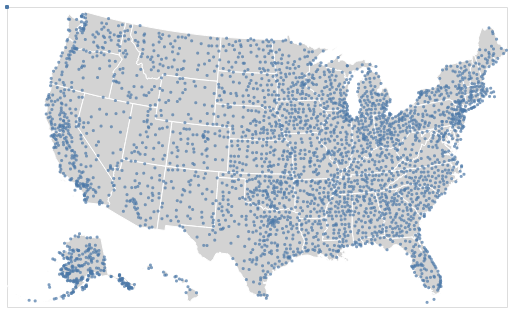

In [6]:
states = alt.topo_feature(data.us_10m.url, feature='states')
airports = data.airports()

background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).project('albersUsa').properties(
    width=500,
    height=300
)

points = alt.Chart(airports).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    size=alt.value(10),
    tooltip='name'
)

background + points

Notice that we need only specify the projection and the chart size once

## Colored Choropleths

The most complicated type of chart to make is one where the map regions are colored to reflect underlying data; the reason this is complicated is because it often involves joining two different datasets using a *lookup transform*.

Again, this is a piece of the API that we're hoping to improve in the future.

As an example, here is a chart representing the total population of each state:

In [7]:
pop = data.population_engineers_hurricanes()
pop.head()

,state,id,population,engineers,hurricanes
0,Alabama,1,4863300,0.003422,22
1,Alaska,2,741894,0.001591,0
2,Arizona,4,6931071,0.004774,0
3,Arkansas,5,2988248,0.002440,0
4,California,6,39250017,0.007126,0


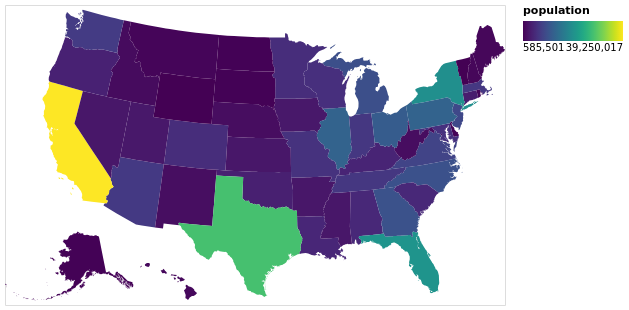

In [8]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')

variable_list = ['population', 'engineers', 'hurricanes']

alt.Chart(states).mark_geoshape().encode(
    color='population:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(pop, 'id', list(pop.columns))
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

Notice the key here: the choropleth data has an "id" column that corresponds to the id column in the population data; we use this as a lookup key to join the two datasets together and plot them appropriately.

For more examples of geographic visualizations, see the [altair gallery](https://altair-viz.github.io/gallery/index.html#maps), and keep in mind that this is an area of Altair and Vega-Lite that is steadily improving!